# Membuat Movie Recommender System

sumber dataset: https://grouplens.org/datasets/movielens/

Import module

In [1]:
import numpy as np
import pandas as pd

Import data movies dan rename column menjadi user_id, dan item_id

In [16]:
dfmovies = pd.read_csv('../ratings.csv', sep=',')
dfmovies = dfmovies.rename(columns={'userId': 'user_id', 'movieId': 'item_id'})

In [17]:
dfmovies.head()

,user_id,item_id,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Import dataset title

In [23]:
dftitle = pd.read_csv('../movies.csv', sep=',')      

In [24]:
dftitle.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
dftitle = dftitle.drop(['genres'], axis=1)
dftitle = dftitle.rename(columns={'movieId': 'item_id'})
dftitle.head()

,item_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


Menggambungkan atau merge dfmovies dengan dftitle berdasarkan kolom item_id

In [26]:
mydf = pd.merge(dfmovies, dftitle, on='item_id')

In [27]:
mydf.head()

,user_id,item_id,rating,timestamp,title
0,1,31,2.5,1260759144,Dangerous Minds (1995)
1,7,31,3.0,851868750,Dangerous Minds (1995)
2,31,31,4.0,1273541953,Dangerous Minds (1995)
3,32,31,4.0,834828440,Dangerous Minds (1995)
4,36,31,3.0,847057202,Dangerous Minds (1995)


exploring dataset

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline

Mencari tau mean dari rating pada tiap judul film (title)

In [32]:
mydf.groupby('title')['rating'].mean()

title
"Great Performances" Cats (1998)                                          1.750000
$9.99 (2008)                                                              3.833333
'Hellboy': The Seeds of Creation (2004)                                   2.000000
'Neath the Arizona Skies (1934)                                           0.500000
'Round Midnight (1986)                                                    2.250000
'Salem's Lot (2004)                                                       3.500000
'Til There Was You (1997)                                                 2.625000
'burbs, The (1989)                                                        3.052632
'night Mother (1986)                                                      5.000000
(500) Days of Summer (2009)                                               3.755556
*batteries not included (1987)                                            3.142857
...And God Spoke (1993)                                                   1.00000

Melihat judul film yang paling banyak mendapatkan penilaian atau rating

In [33]:
mydf.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

membuat dataframe baru

In [34]:
ratings = pd.DataFrame(mydf.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000


In [35]:
ratings['num of ratings'] = pd.DataFrame(mydf.groupby('title')['rating'].count())

In [36]:
ratings.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


visualisasikan distribusi data dalam histogram

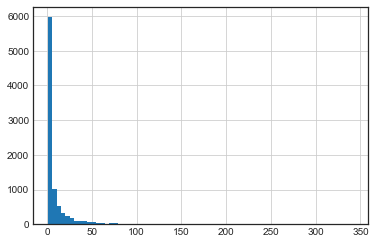

In [37]:
ratings['num of ratings'].hist(bins = 70)

seperti yang kita lihat pada histogram di atas bisa kita simpulkan banyak film yang hampir belum pernah sama sekali atau 0 diberi rating, atau kebanyakan orang hanya menonton film dengan rating tinggi

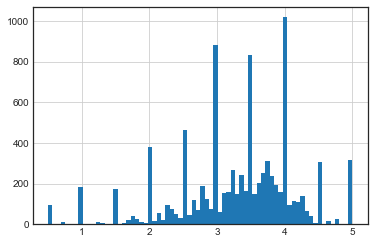

In [38]:
ratings['rating'].hist(bins = 70)

bisa kita lihat lebih jelas dari histogram di atas lebih banyak orang suka menonton film dengan rating 3 - 4

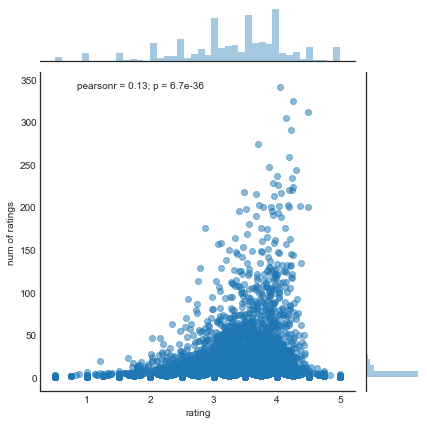

In [39]:
sns.jointplot(x='rating', y='num of ratings', data=ratings, alpha=0.5)

dari histogram di atas bisa kita simpulkan semakin tinggi rating maka semakin banyak jumlah penonton dan reviewernya

membuat pivot table dari dataframe

In [40]:
moviemat = mydf.pivot_table(index='user_id', columns='title', values='rating')

In [42]:
moviemat.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


banyak missing values karena banyak film yang belum ditonton dan direview oleh pengunjung 

In [43]:
ratings.sort_values('num of ratings', ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291
Jurassic Park (1993),3.706204,274
"Matrix, The (1999)",4.183398,259
Toy Story (1995),3.872470,247
Schindler's List (1993),4.303279,244


mengambil 2 judul film sebagai sample

In [44]:
forrestgump_user_ratings = moviemat['Forrest Gump (1994)']
jurassicpark_user_ratings = moviemat['Jurassic Park (1993)']

In [45]:
forrestgump_user_ratings.head()

user_id
1    NaN
2    3.0
3    5.0
4    5.0
5    4.0
Name: Forrest Gump (1994), dtype: float64

In [47]:
similar_to_forrestgump = moviemat.corrwith(forrestgump_user_ratings)

C:\Users\bitxt\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\bitxt\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


Melihat koorelasi dari film Forrest Gump dengan judul film lainnya

In [48]:
similiar_to_jurassicpark = moviemat.corrwith(jurassicpark_user_ratings)

C:\Users\bitxt\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\bitxt\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


melihat koorelasi film jurassic park dengan judul film lainnya

In [49]:
corr_forrestgump = pd.DataFrame(similar_to_forrestgump, columns=['Correlation'])
corr_forrestgump.dropna(inplace=True)

In [50]:
corr_forrestgump.head()

,Correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422


Melihat koorelasi film forrest gump dengan judul film lainnya dalam bentuk dataframe

In [51]:
corr_forrestgump.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
$9.99 (2008),1.0
Say It Isn't So (2001),1.0
Metropolis (2001),1.0
"See No Evil, Hear No Evil (1989)",1.0
Middle Men (2009),1.0
Water for Elephants (2011),1.0
"Watch, The (2012)",1.0
Cheech & Chong's Next Movie (1980),1.0
Forrest Gump (1994),1.0


menambahkan kolom number of ratings ke dalam dataframe koorelasi film forrest gump

In [52]:
corr_forrestgump = corr_forrestgump.join(ratings['num of ratings'])

In [53]:
corr_forrestgump.head()

,Correlation,num of ratings
title,,
$9.99 (2008),1.000000,3
"'burbs, The (1989)",0.044946,19
(500) Days of Summer (2009),0.624458,45
*batteries not included (1987),0.603023,7
...And Justice for All (1979),0.173422,13


selanjutnya menyeleksi atau menghapus film yang memiliki num of ratings di bawah 20, kenapa 20? angka ini diambil dari visualisasi distribusi num of ratings, yang kebanyakan adalah pengunjung sudah mereview 20 film

In [54]:
corr_forrestgump[corr_forrestgump['num of ratings'] > 20].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,341
Diner (1982),0.815796,22
October Sky (1999),0.814027,35
Coyote Ugly (2000),0.786340,27
"Devil Wears Prada, The (2006)",0.779763,21


pada dataframe koorelasi forrest gump dengan judul film lain di atas bisa kita simpulkan, pengunjung yang menonton forrest gump biasanya akan menonton Dinner kemudian October Sky, lalu Coyote Ugly, dan Devil Wears Prada, The. 

melihat koorelasi film jurassic park

In [55]:
corr_jurassicpark = pd.DataFrame(similiar_to_jurassicpark, columns=['Correlation'])

In [57]:
corr_jurassicpark.dropna(inplace=True)
corr_jurassicpark.head(10)

,Correlation
title,
"'burbs, The (1989)",-0.347920
(500) Days of Summer (2009),0.472111
*batteries not included (1987),0.155980
...And Justice for All (1979),0.589821
10 (1979),0.500000
10 Cloverfield Lane (2016),0.500000
10 Things I Hate About You (1999),-0.026601
"10,000 BC (2008)",0.476112
101 Dalmatians (1996),0.392184


menambahkan kolom num of ratings ke dalam dataframe corr_jurassicpark

In [58]:
corr_jurassicpark = corr_jurassicpark.join(ratings['num of ratings'])

In [59]:
corr_jurassicpark.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",-0.347920,19
(500) Days of Summer (2009),0.472111,45
*batteries not included (1987),0.155980,7
...And Justice for All (1979),0.589821,13
10 (1979),0.500000,5


menghilangkan observe dengan num of ratings kurang dari 20

In [60]:
corr_jurassicpark[corr_jurassicpark['num of ratings'] > 20].sort_values('Correlation', ascending=False).head() 

,Correlation,num of ratings
title,,
Jurassic Park (1993),1.000000,274
Dallas Buyers Club (2013),0.736914,21
National Lampoon's Vacation (1983),0.735255,30
Whiplash (2014),0.716685,28
Mission: Impossible III (2006),0.714473,21


bisa kita lihat dari dataframe di atas, kebanyakan penonton yang menyukai jurassic park biasanya akan menonton Dallas Buyers Club, National Lampoon's Vacation, Whiplash, Mission: Impossible III